In [1]:
import os
import glob
import torch
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pytorch3d.ops import box3d_overlap

car_predict = np.load("outputs/car_predict.npy")
car_predict_max = np.load("outputs/car_predict.npy")

In [2]:
gtruth_boxes = list()
inference_boxes = list()
iou = list()

for j in range (0, car_predict.size):
    file = glob.glob("extract/out_corners/1/"+str(j)+"[.]*[_]*[.]*[.]npy")[0]
    folder, element = file.split(".")[-3], file.split(".")[-2]
    
    inference_boxes.append(np.load(file))

    if(not j == (car_predict.size - 1)):
        files = glob.glob("extract/gtruth_corners/1/*[.]"+folder+"[.]"+element+"[.]npy")

        for file in files:
            gtruth_boxes.append(np.load(file))
        
        if len(gtruth_boxes) == 0:
            for box in inference_boxes:
                iou.append(0)
        
        else: 
            gtruth_boxes = torch.tensor(np.array(gtruth_boxes), dtype=torch.float)
            inference_boxes = torch.tensor(np.array(inference_boxes), dtype=torch.float)

            intersection_vol, iou_3d = box3d_overlap(inference_boxes, gtruth_boxes)

            for tensor in intersection_vol:
                iou.append(torch.sum(tensor).item())

        gtruth_boxes = []
        inference_boxes = []

iou = np.array(iou)

car_predict_iou = car_predict[np.where(iou!=0)]
car_predict_no_iou = car_predict[np.where(iou==0)]

for i in np.where(iou==0):
    car_predict_max[i] = 100

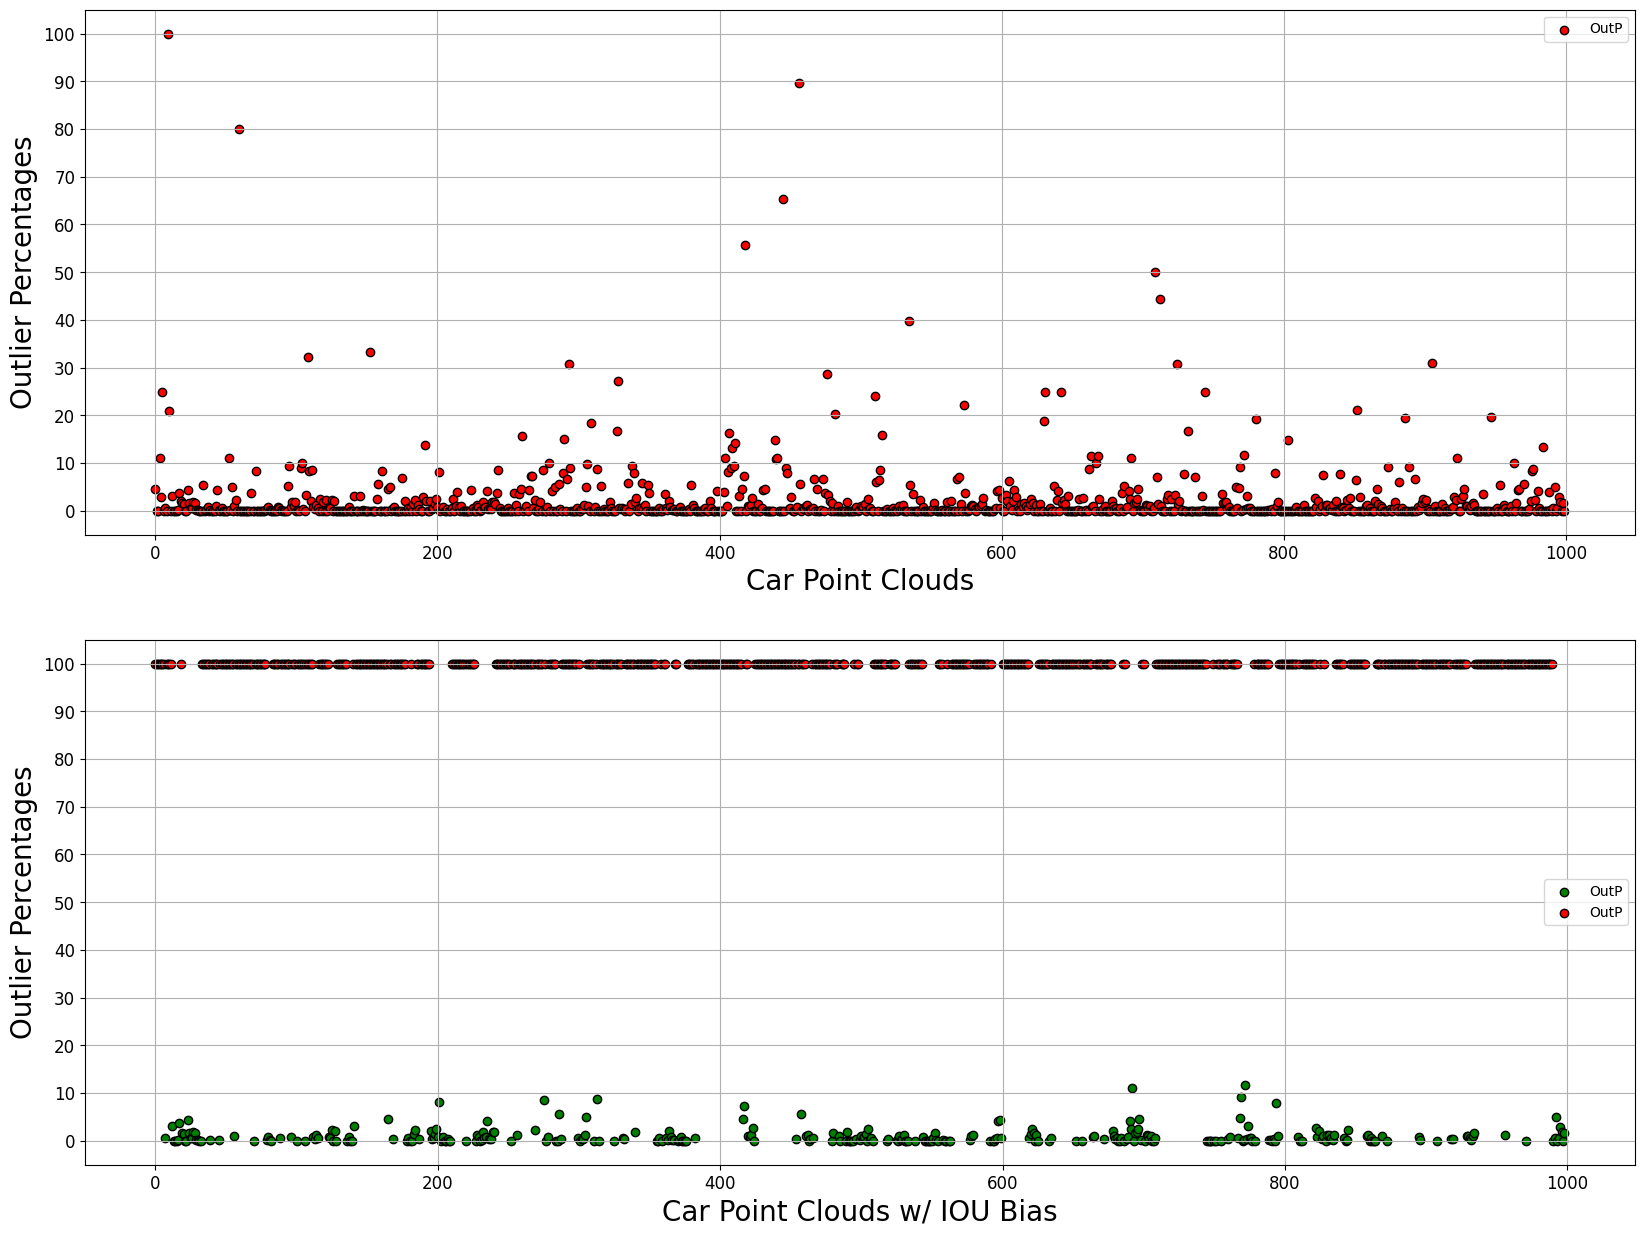

In [3]:
X = np.arange(0, len(car_predict))

plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots(2)
ax[0].scatter(X, car_predict, edgecolor='black',color='red', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Car Point Clouds', fontsize=20)

########################

ax[1].scatter(X[np.where(iou!=0)], car_predict_max[np.where(iou!=0)], edgecolor='black',color='green', label='OutP')
ax[1].scatter(X[np.where(iou==0)], car_predict_max[np.where(iou==0)], edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Car Point Clouds w/ IOU Bias', fontsize=20)
plt.show()

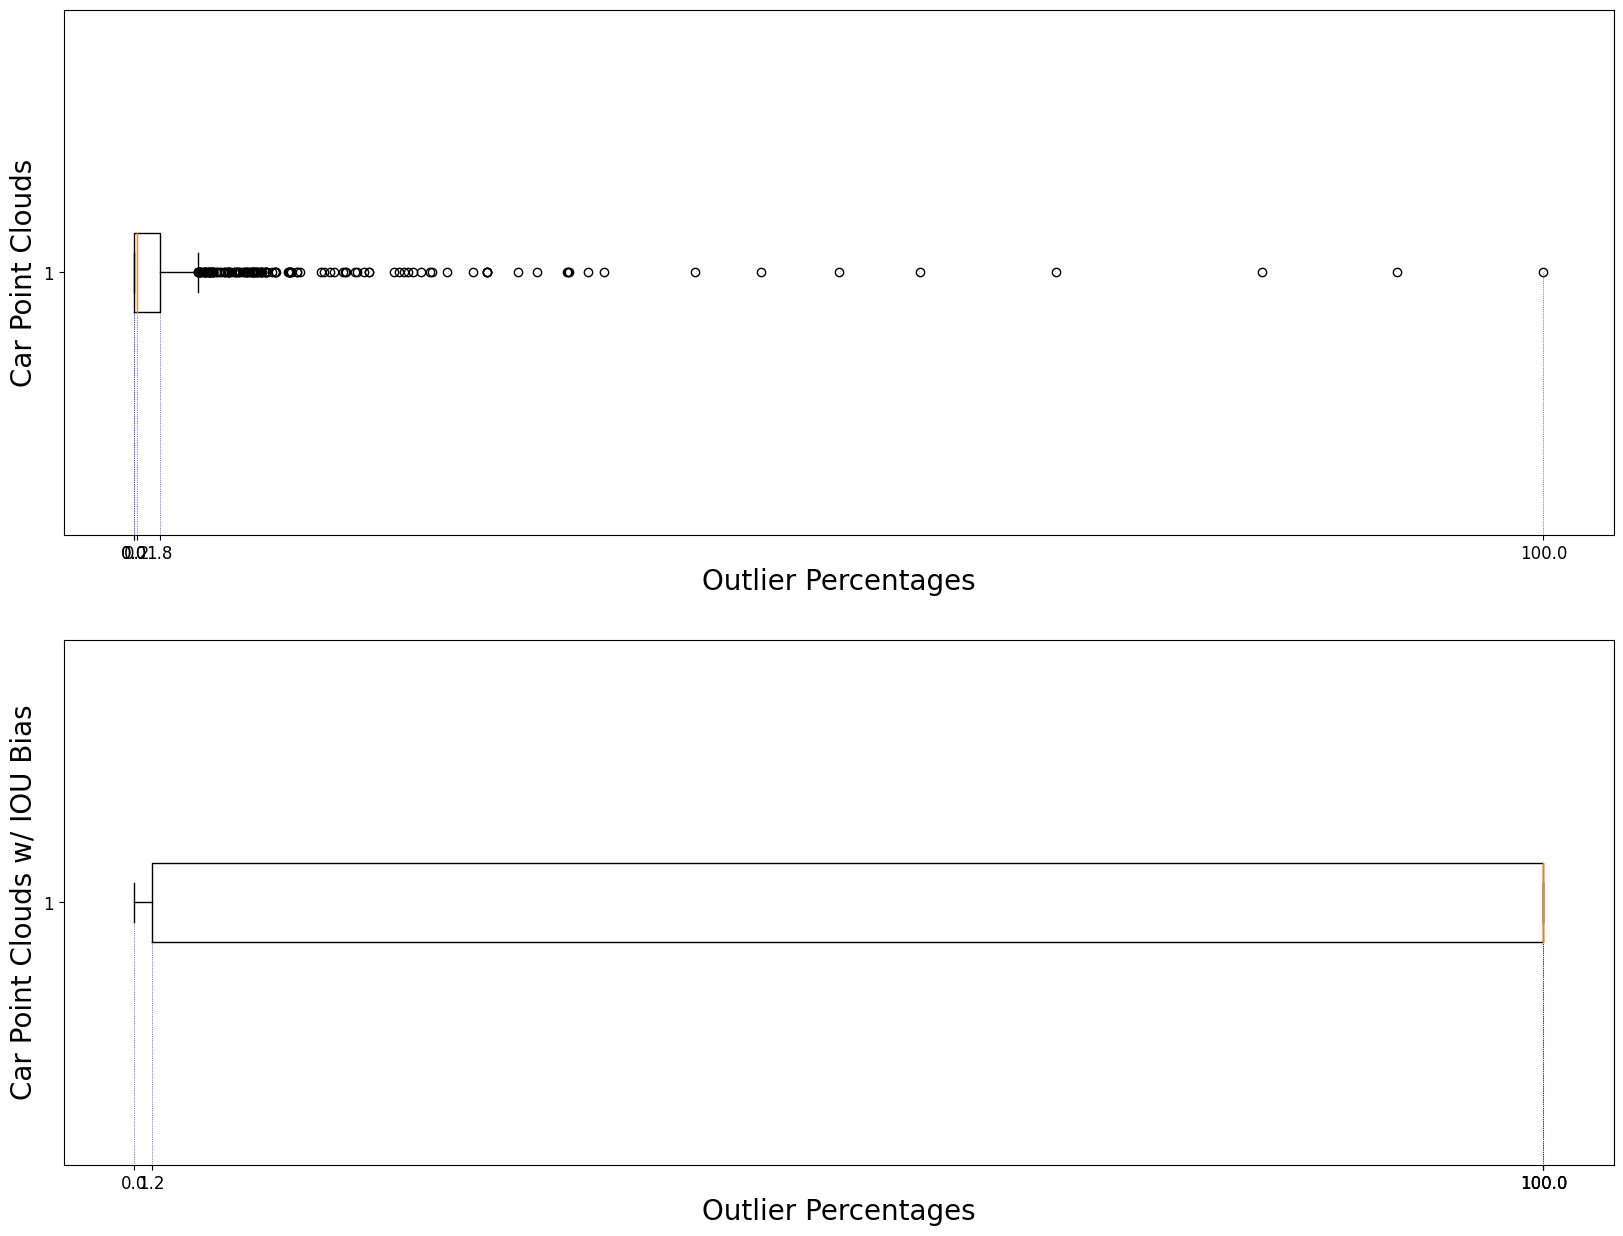

In [4]:
fig, ax = plt.subplots(2, figsize=(20, 15))
##1
ax[0].boxplot(car_predict, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Car Point Clouds', fontsize=20)

quantiles = np.percentile(car_predict, np.arange(0, 110, step=25))
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##2
ax[1].boxplot(car_predict_max, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Car Point Clouds w/ IOU Bias', fontsize=20)

quantiles = np.percentile(car_predict_max, np.arange(0, 110, step=25))
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

In [5]:
print("Outliers:")
print("Sample Size:" + str(len(car_predict)))
print("Percentiles:" + str(np.percentile(car_predict, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(car_predict)))
print("Variance:" + str(np.var(car_predict)))
print("\n")
print("Outliers w/ IOU Bias:")
print("Sample Size:" + str(len(car_predict_max)))
print("Percentiles:" + str(np.percentile(car_predict_max, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(car_predict_max)))
print("Variance:" + str(np.var(car_predict_max)))
print("Miss%:" + str((car_predict_max[np.where(iou==0)].size/car_predict_max.size)*100))

Outliers:
Sample Size:1000
Percentiles:[  0.           0.           0.           0.           0.
   0.18276133   0.6006006    1.19634848   2.45111423   6.33722817
 100.        ]
Standard Deviation:7.390203624436771
Variance:54.61510961063839


Outliers w/ IOU Bias:
Sample Size:1000
Percentiles:[  0.           0.           0.68493151   3.57836089 100.
 100.         100.         100.         100.         100.
 100.        ]
Standard Deviation:46.27825645427808
Variance:2141.6770204479308
Miss%:67.80000000000001


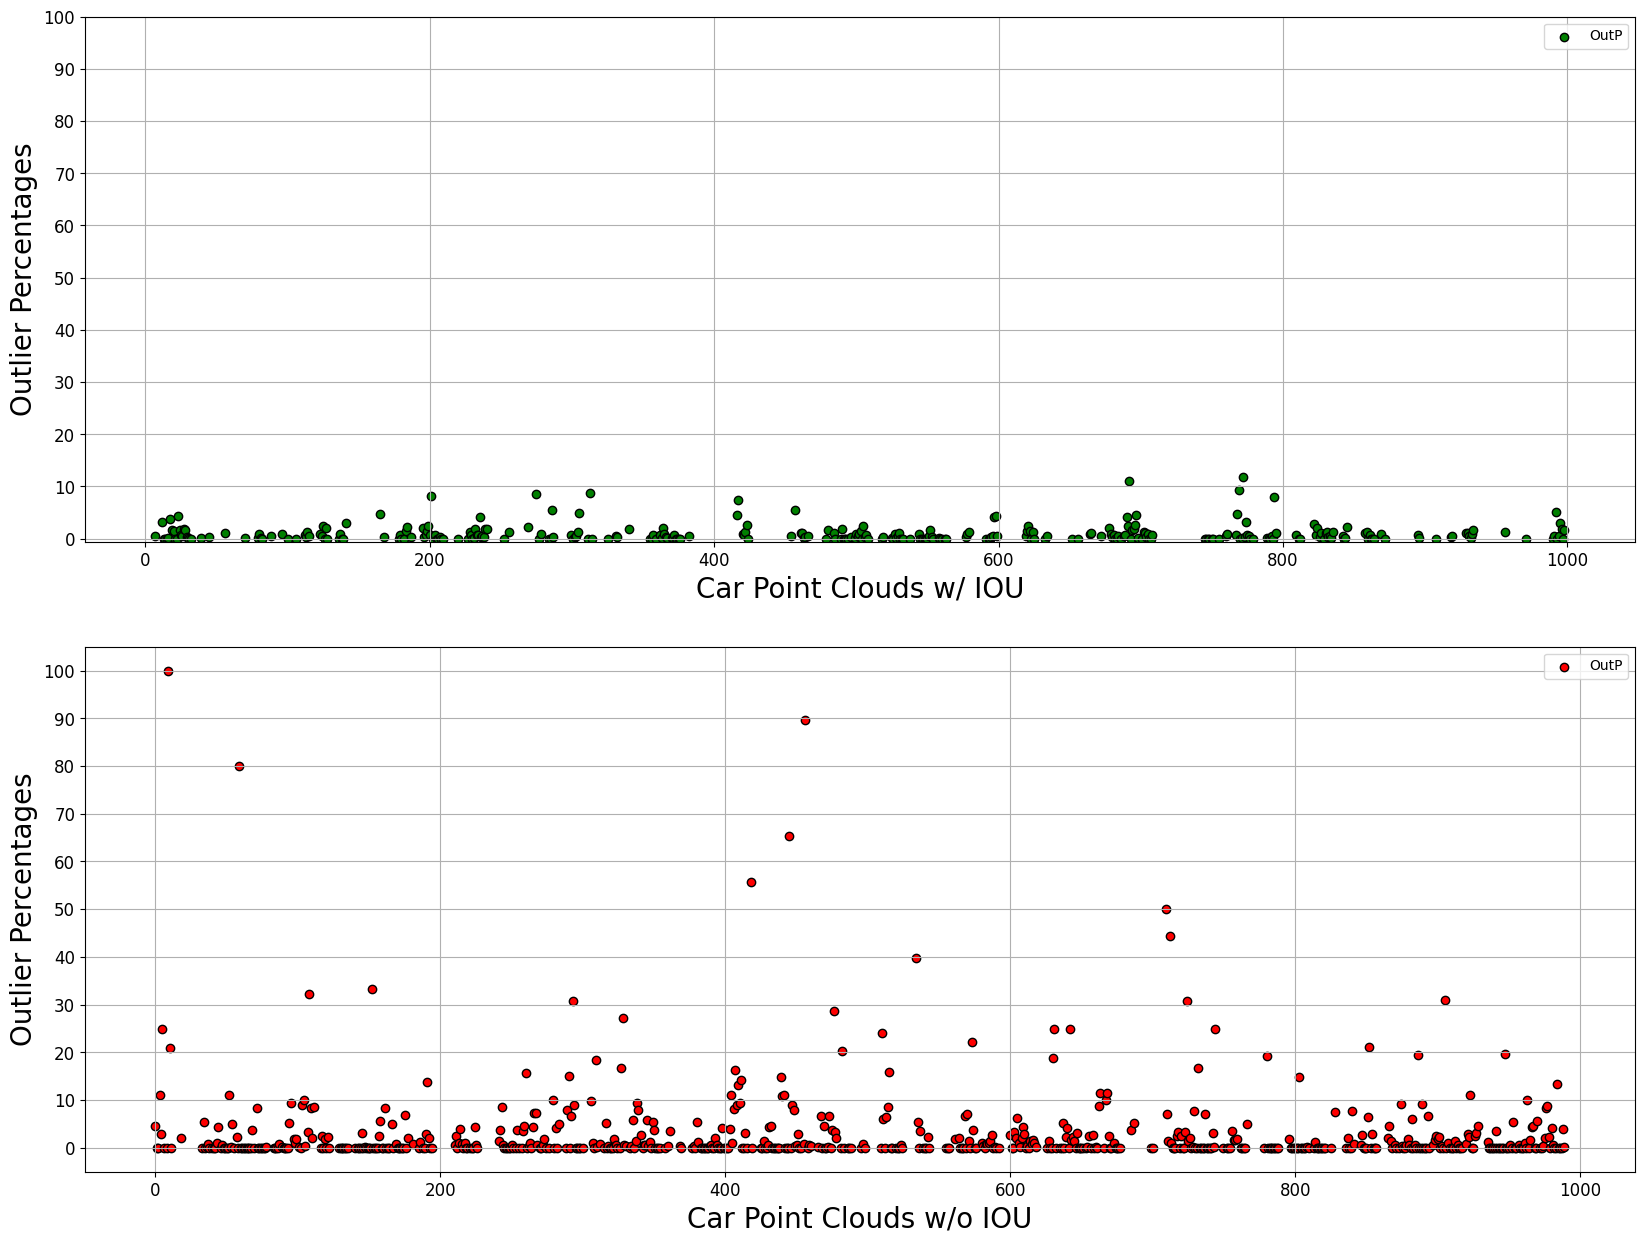

In [6]:
X = np.arange(0, len(car_predict))

plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots(2)
ax[0].scatter(X[np.where(iou!=0)], car_predict_iou, edgecolor='black',color='green', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Car Point Clouds w/ IOU', fontsize=20)

########################

ax[1].scatter(X[np.where(iou==0)], car_predict_no_iou, edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Car Point Clouds w/o IOU', fontsize=20)
plt.show()

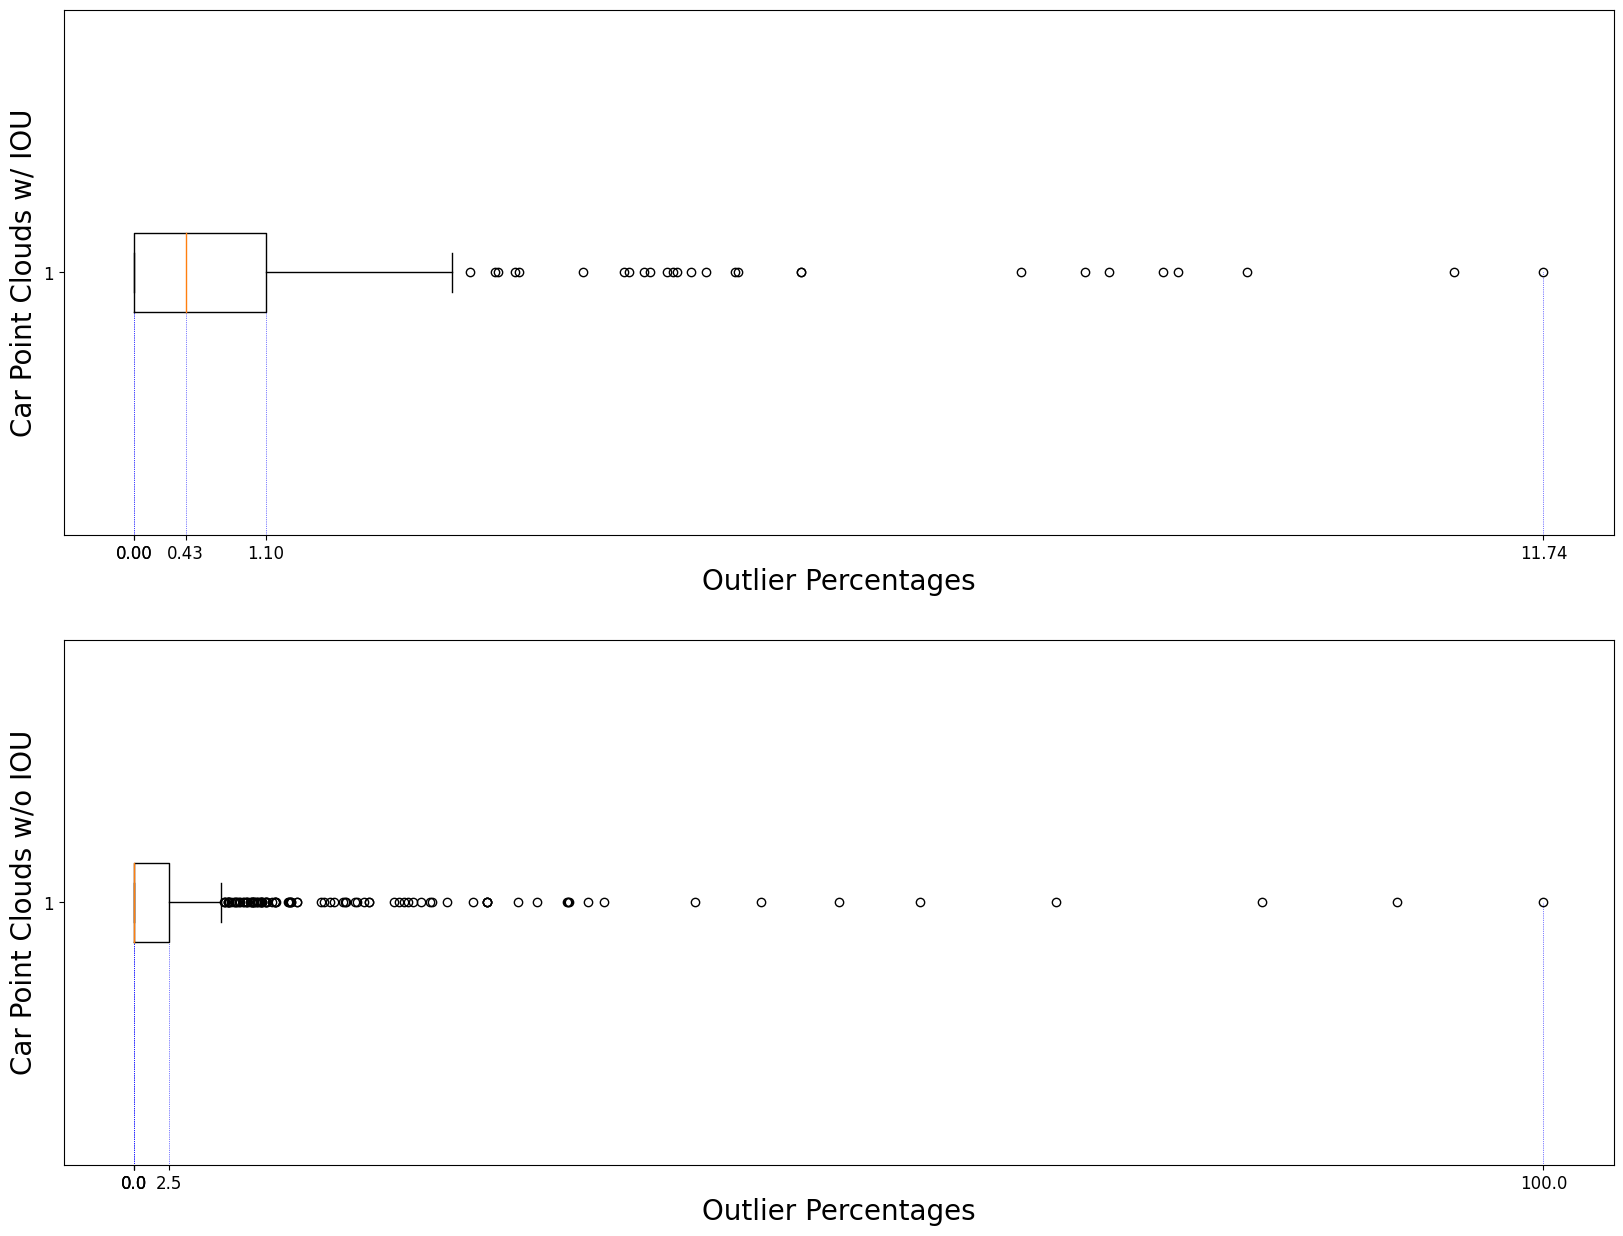

In [7]:
fig, ax = plt.subplots(2, figsize=(20, 15))
##1
ax[0].boxplot(car_predict_iou, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Car Point Clouds w/ IOU', fontsize=20)

quantiles = np.percentile(car_predict_iou, np.arange(0, 110, step=25))
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##2
ax[1].boxplot(car_predict_no_iou, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Car Point Clouds w/o IOU', fontsize=20)

quantiles = np.percentile(car_predict_no_iou, np.arange(0, 110, step=25))
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

In [8]:
print("IOU:")
print("Sample Size:" + str(len(car_predict_iou)))
print("Percentiles:" + str(np.percentile(car_predict_iou, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(car_predict_iou)))
print("Variance:" + str(np.var(car_predict_iou)))
print("\n")
print("No IOU:")
print("Sample Size:" + str(len(car_predict_no_iou)))
print("Percentiles:" + str(np.percentile(car_predict_no_iou, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(car_predict_no_iou)))
print("Variance:" + str(np.var(car_predict_no_iou)))

IOU:
Sample Size:321
Percentiles:[ 0.          0.          0.          0.          0.19181586  0.42857143
  0.61686086  0.92879257  1.32575758  2.38948626 11.73913043]
Standard Deviation:1.7028037465489023
Variance:2.899540599260978


No IOU:
Sample Size:678
Percentiles:[  0.           0.           0.           0.           0.
   0.           0.5610025    1.78834182   3.69011213   8.41258741
 100.        ]
Standard Deviation:8.812038282989814
Variance:77.65201870087807


In [9]:
# Calculate highest anomaly.

temp = np.absolute(car_predict_max-10)
index = temp.argmin()

file = glob.glob("extract/out_corners/1/"+str(index)+"[.]*[_]*[.]*[.]npy")[0]
folder, element = file.split(".")[-3], file.split(".")[-2]

print("Nearest score to the given value is: ", car_predict_max[index])
print("Index of nearest value is : ", index)
print("Folder: ", folder)
print("Element:", element)

Nearest score to the given value is:  9.271523178807946
Index of nearest value is :  769
Folder:  20220829_184801
Element: 1661792344072243000
